### ML for Programmed cell death protein 1/Programmed cell death 1 ligand 1(pd-1/pd-L1) Prediction


### DATA SOURCING

Importing Libraries

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# installing libraries
!pip install chembl_webresource_client

In [ ]:
# importing library
from chembl_webresource_client.new_client import new_client

Searching for the Target

In [ ]:
target = new_client.target
target_query = target.search('pd-L1')
target = pd.DataFrame.from_dict(target_query)
target

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Programmed cell death protein 1/Programmed cel...,22.0,False,CHEMBL4523993,"[{'accession': 'Q15116', 'component_descriptio...",PROTEIN COMPLEX,9606.0
1,[],Homo sapiens,Programmed cell death 1 ligand 1,21.0,False,CHEMBL3580522,"[{'accession': 'Q9NZQ7', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Mus musculus,Programmed cell death protein 1/Programmed cel...,20.0,False,CHEMBL4630756,"[{'accession': 'Q9EP73', 'component_descriptio...",PROTEIN COMPLEX,10090.0
3,[],Mus musculus,Programmed cell death 1 ligand 1,19.0,False,CHEMBL4523448,"[{'accession': 'Q9EP73', 'component_descriptio...",SINGLE PROTEIN,10090.0
4,[],None,PD-145,18.0,False,CHEMBL614845,[],CELL-LINE,NaN
5,[],Human papillomavirus type 16,Major capsid protein L1,15.0,False,CHEMBL3562172,"[{'accession': 'P03101', 'component_descriptio...",SINGLE PROTEIN,333760.0
6,[],Human papillomavirus type 58,Major capsid protein L1,15.0,False,CHEMBL3562173,"[{'accession': 'P26535', 'component_descriptio...",SINGLE PROTEIN,10598.0
7,[],Human papillomavirus type 18,Major capsid protein L1,15.0,False,CHEMBL3562174,"[{'accession': 'P06794', 'component_descriptio...",SINGLE PROTEIN,333761.0
8,[],Homo sapiens,Apolipoprotein L1,15.0,False,CHEMBL4680021,"[{'accession': 'O14791', 'component_descriptio...",SINGLE PROTEIN,9606.0
9,[],Homo sapiens,Neural cell adhesion molecule L1,15.0,False,CHEMBL5169129,"[{'accession': 'P32004', 'component_descriptio...",SINGLE PROTEIN,9606.0


Select and retrieve  Pd-1/pd-L1

In [ ]:
selected_target = target.target_chembl_id[0]
selected_target

'CHEMBL4523993'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id =selected_target).filter(standard_type = "IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,18884511,[],CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,None,None,BAO_0000190,...,Homo sapiens,Programmed cell death protein 1/Programmed cel...,9606,None,None,IC50,nM,UO_0000065,None,96.0
1,None,None,18884512,[],CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,None,None,BAO_0000190,...,Homo sapiens,Programmed cell death protein 1/Programmed cel...,9606,None,None,IC50,nM,UO_0000065,None,2.5
2,None,None,18884513,[],CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,None,None,BAO_0000190,...,Homo sapiens,Programmed cell death protein 1/Programmed cel...,9606,None,None,IC50,nM,UO_0000065,None,2.2
3,None,None,18884514,[],CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,None,None,BAO_0000190,...,Homo sapiens,Programmed cell death protein 1/Programmed cel...,9606,None,None,IC50,nM,UO_0000065,None,25.0
4,None,None,18884515,[],CHEMBL4312946,Inhibition of human Fc-tagged PD1 N-terminal d...,B,None,None,BAO_0000190,...,Homo sapiens,Programmed cell death protein 1/Programmed cel...,9606,None,None,IC50,nM,UO_0000065,None,3.0


In [ ]:
df.shape

(1443, 46)

###  DATA CLEANING

Handling Missing data

In [ ]:
# drop null values in standard_value and canonica;_smiles
df.dropna(subset=['standard_value', 'canonical_smiles'], inplace=True)

In [ ]:
df.shape

(1422, 46)

In [ ]:
# strip white spaces from canonical smiles
df['canonical_smiles'] = df['canonical_smiles'].str.strip()

In [ ]:
# select only chembl_id, smiles, standard_value
df1 = df[['molecule_chembl_id', 'canonical_smiles', 'standard_value']]
df1

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.0
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.5
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.2
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.0
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.0
...,...,...,...
1438,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.7
1439,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.7
1440,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66
1441,CHEMBL5403219,COc1nc(-c2cccc(-c3ccccc3F)c2C)ccc1CNCCC(N)=O,0.93


In [ ]:
df1.to_csv('bioactivty_data.csv', index=False, header=True)

### DATA PREPROCESSING

Data pre-processing of the bioactivity data  

Labeling compounds as either being active, inactive or intermediate  
The bioactivity data is in the IC50 unit. Compounds having values of less than  
 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive.   
 As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [ ]:
df2 = pd.read_csv('bioactivty_data.csv')
df2

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.00
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.50
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.20
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.00
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.00
...,...,...,...
1417,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.70
1418,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.70
1419,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66
1420,CHEMBL5403219,COc1nc(-c2cccc(-c3ccccc3F)c2C)ccc1CNCCC(N)=O,0.93


In [ ]:
bioactivity_threshold = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
# append bioactivity_threshold to df3
df2['bioactivity_threshold'] = bioactivity_threshold
df2


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_threshold
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.00,active
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.50,active
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.20,active
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.00,active
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.00,active
...,...,...,...,...
1417,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.70,active
1418,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.70,active
1419,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66,active
1420,CHEMBL5403219,COc1nc(-c2cccc(-c3ccccc3F)c2C)ccc1CNCCC(N)=O,0.93,active


In [ ]:
df2.rename(columns={'bioactivity_threshold':'class'}, inplace=True)

In [ ]:
df2.to_csv('bioactivty_data_preprocessed_class.csv', index=False, header=True)

In [ ]:
df3 = pd.read_csv('bioactivty_data_preprocessed_class.csv')
df3

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.00,active
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.50,active
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.20,active
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.00,active
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.00,active
...,...,...,...,...
1417,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.70,active
1418,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.70,active
1419,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66,active
1420,CHEMBL5403219,COc1nc(-c2cccc(-c3ccccc3F)c2C)ccc1CNCCC(N)=O,0.93,active


In [ ]:
d3 = df3['class'] == 'intermediate'

In [ ]:
d3.value_counts()

,count
class,
False,1276
True,146


In [ ]:
# drop intermediate
df3_no_intermediate = df3[df3['class'] != 'intermediate']
df3_no_intermediate

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.00,active
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.50,active
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.20,active
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.00,active
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.00,active
...,...,...,...,...
1416,CHEMBL5426840,CC(C)OC(=O)[C@H](CO)NCc1cc(Cl)c(OCc2cccc(-c3cc...,45.20,active
1417,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.70,active
1418,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.70,active
1419,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66,active


In [ ]:
df3_no_intermediate.shape

(1276, 4)

In [ ]:
df3_no_intermediate.to_csv('bioactivity_data_no_intermediate.csv', index = False, header = True)

In [ ]:
df4 = pd.read_csv('bioactivity_data_no_intermediate.csv')
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.00,active
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.50,active
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.20,active
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.00,active
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.00,active
...,...,...,...,...
1271,CHEMBL5426840,CC(C)OC(=O)[C@H](CO)NCc1cc(Cl)c(OCc2cccc(-c3cc...,45.20,active
1272,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.70,active
1273,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.70,active
1274,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66,active


In [ ]:
# activity column
activity = []
for i in df4['class']:
  if i == 'active':
    activity.append(1)
  else:
    activity.append(0)


In [ ]:
df4['activity'] = activity
df4

,molecule_chembl_id,canonical_smiles,standard_value,class,activity
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.00,active,1
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.50,active,1
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.20,active,1
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.00,active,1
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.00,active,1
...,...,...,...,...,...
1271,CHEMBL5426840,CC(C)OC(=O)[C@H](CO)NCc1cc(Cl)c(OCc2cccc(-c3cc...,45.20,active,1
1272,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.70,active,1
1273,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.70,active,1
1274,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66,active,1


In [ ]:
df4.to_csv('bioactivty_data_preprocessed_class.csv', index=False, header=True)

### LIPINKI'S DESCRIPTORS

 Lipinki's Descriptors calculation and exploratory analysis

**Calculate Lipinski descriptors**  
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile.   Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the   Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:  

Molecular weight < 500 Dalton  
Octanol-water partition coefficient (LogP) < 5  
Hydrogen bond donors < 5  
Hydrogen bond acceptors < 10  


Install rdkit

In [ ]:
# Install prebuilt RDKit and keep NumPy compatible
!pip install numpy==1.26.4  # Newer version that satisfies TensorFlow and others
!pip install rdkit-pypi==2022.9.5 seaborn matplotlib --no-deps


In [ ]:
# calculating lipinki's rule
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# calculate Lipinski'rule
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1, 1)

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors


In [ ]:
df5 = pd.read_csv('bioactivty_data_preprocessed_class.csv')
df5

,molecule_chembl_id,canonical_smiles,standard_value,class,activity
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.00,active,1
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.50,active,1
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.20,active,1
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.00,active,1
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.00,active,1
...,...,...,...,...,...
1271,CHEMBL5426840,CC(C)OC(=O)[C@H](CO)NCc1cc(Cl)c(OCc2cccc(-c3cc...,45.20,active,1
1272,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.70,active,1
1273,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.70,active,1
1274,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66,active,1


In [ ]:
df_lipinski = lipinski(df5.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,419.525,3.87032,2.0,5.0
1,534.660,5.62082,2.0,6.0
2,477.608,6.50462,1.0,5.0
3,684.838,4.38704,4.0,10.0
4,915.108,7.88804,4.0,12.0
...,...,...,...,...
1271,639.974,6.72460,2.0,7.0
1272,556.062,6.69290,2.0,6.0
1273,721.276,6.15280,1.0,10.0
1274,382.531,5.30824,0.0,2.0


In [ ]:
# combine df5 and df_Lipinski
df_combined = pd.concat([df5, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,activity,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.00,active,1,419.525,3.87032,2.0,5.0
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.50,active,1,534.660,5.62082,2.0,6.0
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.20,active,1,477.608,6.50462,1.0,5.0
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.00,active,1,684.838,4.38704,4.0,10.0
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.00,active,1,915.108,7.88804,4.0,12.0
...,...,...,...,...,...,...,...,...,...
1271,CHEMBL5426840,CC(C)OC(=O)[C@H](CO)NCc1cc(Cl)c(OCc2cccc(-c3cc...,45.20,active,1,639.974,6.72460,2.0,7.0
1272,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.70,active,1,556.062,6.69290,2.0,6.0
1273,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.70,active,1,721.276,6.15280,1.0,10.0
1274,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66,active,1,382.531,5.30824,0.0,2.0


In [ ]:
df_combined.to_csv('bioactivty_data_preprocessed_classLipinki.csv', index=False, header=True)

Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10  
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [ ]:
# convert IC50 in standaed_value tO pIC50
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis =1)

    return x



In [ ]:
df_combined.standard_value.describe()

,standard_value
count,1.276000e+03
mean,1.667601e+04
std,1.751613e+05
min,8.000000e-05
25%,1.550000e+01
50%,9.230000e+01
75%,4.076250e+02
max,5.000000e+06


In [ ]:

-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm


,molecule_chembl_id,canonical_smiles,class,activity,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,active,1,419.525,3.87032,2.0,5.0,96.00
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,active,1,534.660,5.62082,2.0,6.0,2.50
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,active,1,477.608,6.50462,1.0,5.0,2.20
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,active,1,684.838,4.38704,4.0,10.0,25.00
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,active,1,915.108,7.88804,4.0,12.0,3.00
...,...,...,...,...,...,...,...,...,...
1271,CHEMBL5426840,CC(C)OC(=O)[C@H](CO)NCc1cc(Cl)c(OCc2cccc(-c3cc...,active,1,639.974,6.72460,2.0,7.0,45.20
1272,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,active,1,556.062,6.69290,2.0,6.0,2.70
1273,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,active,1,721.276,6.15280,1.0,10.0,2.70
1274,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,active,1,382.531,5.30824,0.0,2.0,29.66


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,1.276000e+03
mean,1.667601e+04
std,1.751613e+05
min,8.000000e-05
25%,1.550000e+01
50%,9.230000e+01
75%,4.076250e+02
max,5.000000e+06


In [ ]:

df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,active,1,419.525,3.87032,2.0,5.0,7.017729
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,active,1,534.660,5.62082,2.0,6.0,8.602060
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,active,1,477.608,6.50462,1.0,5.0,8.657577
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,active,1,684.838,4.38704,4.0,10.0,7.602060
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,active,1,915.108,7.88804,4.0,12.0,8.522879
...,...,...,...,...,...,...,...,...,...
1271,CHEMBL5426840,CC(C)OC(=O)[C@H](CO)NCc1cc(Cl)c(OCc2cccc(-c3cc...,active,1,639.974,6.72460,2.0,7.0,7.344862
1272,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,active,1,556.062,6.69290,2.0,6.0,8.568636
1273,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,active,1,721.276,6.15280,1.0,10.0,8.568636
1274,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,active,1,382.531,5.30824,0.0,2.0,7.527829


In [ ]:
df_final.to_csv('bioactivity_data_3class_pIC50.csv', index=False)

In [ ]:
df6= pd.read_csv('bioactivity_data_3class_pIC50.csv')
df6

,molecule_chembl_id,canonical_smiles,class,activity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,active,1,419.525,3.87032,2.0,5.0,7.017729
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,active,1,534.660,5.62082,2.0,6.0,8.602060
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,active,1,477.608,6.50462,1.0,5.0,8.657577
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,active,1,684.838,4.38704,4.0,10.0,7.602060
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,active,1,915.108,7.88804,4.0,12.0,8.522879
...,...,...,...,...,...,...,...,...,...
1271,CHEMBL5426840,CC(C)OC(=O)[C@H](CO)NCc1cc(Cl)c(OCc2cccc(-c3cc...,active,1,639.974,6.72460,2.0,7.0,7.344862
1272,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,active,1,556.062,6.69290,2.0,6.0,8.568636
1273,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,active,1,721.276,6.15280,1.0,10.0,8.568636
1274,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,active,1,382.531,5.30824,0.0,2.0,7.527829


<Axes: xlabel='MW', ylabel='LogP'>

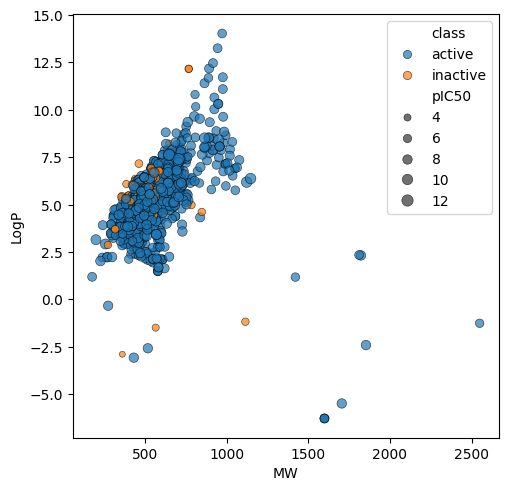

In [ ]:
# exploratory analysis of the chemical space
# MW vs logp
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df6, hue='class', size='pIC50', edgecolor='k', alpha=0.7)

<Axes: xlabel='class', ylabel='count'>

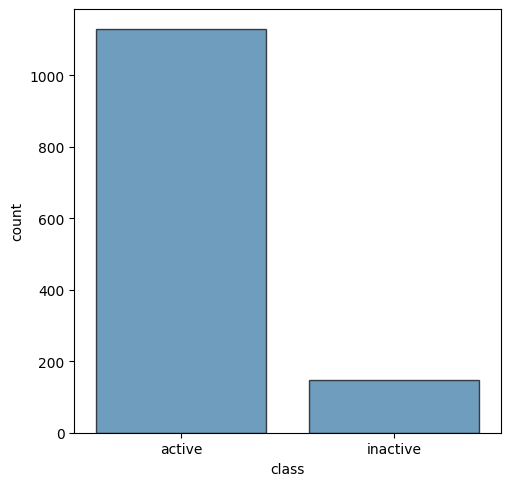

In [ ]:
# boxplot active vs inactive class
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x= 'class', data=df6,  edgecolor='k', alpha=0.7)

<Axes: xlabel='class', ylabel='pIC50'>

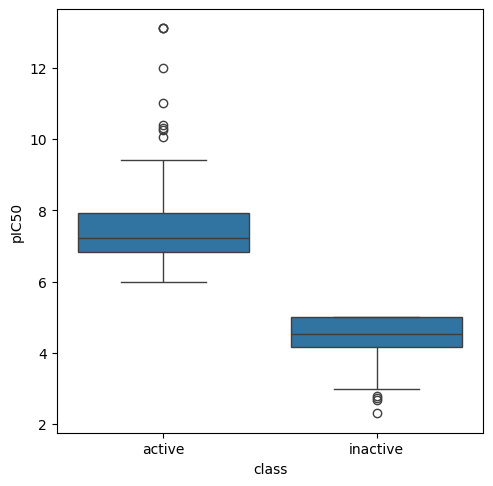

In [ ]:
# boxplot for PIC50
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x= 'class', y='pIC50', data=df6)

Statistical analysis | Mann-Whitney U Test

In [ ]:
!pip install scipy

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df6[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df6[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [ ]:
# PIC50
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,165963.0,6.870010e-87,0.05,Different distribution (reject H0)


<Axes: xlabel='class', ylabel='MW'>

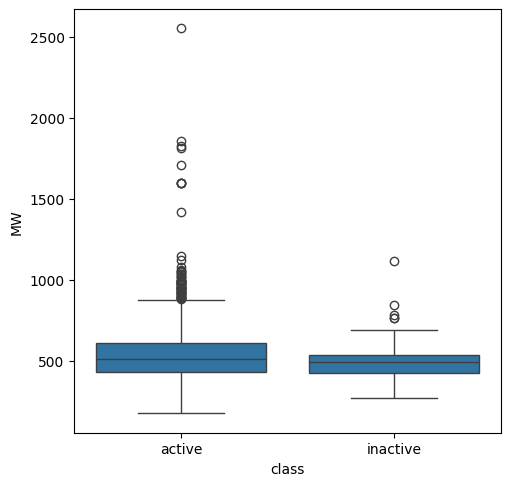

In [ ]:
# plot mw
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x= 'class', y='MW', data=df6)

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,98218.5,0.000288,0.05,Different distribution (reject H0)


<Axes: xlabel='class', ylabel='LogP'>

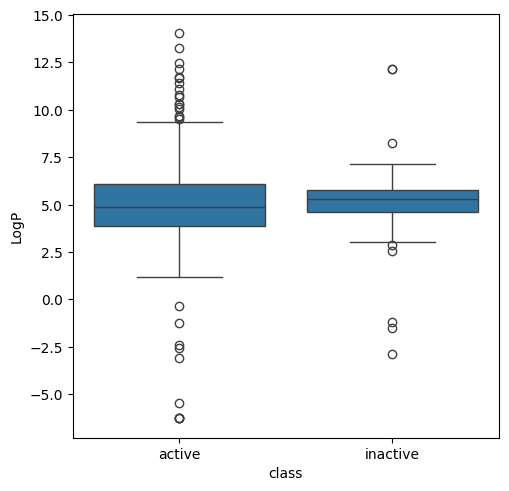

In [ ]:
# plot logp
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x= 'class', y='LogP', data=df6)


In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,74541.0,0.044608,0.05,Different distribution (reject H0)


<Axes: xlabel='class', ylabel='NumHDonors'>

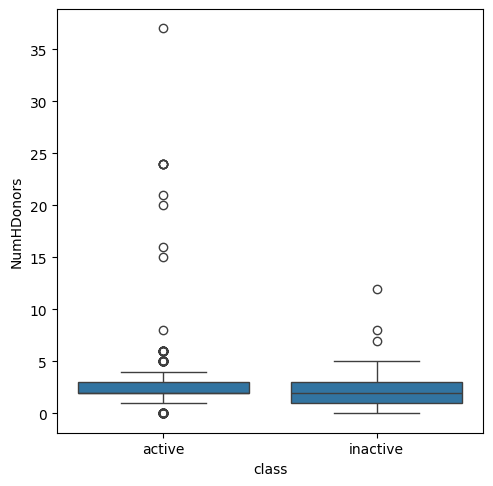

In [ ]:
# plot numhdonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x= 'class', y='NumHDonors', data=df6)

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,100031.5,0.000024,0.05,Different distribution (reject H0)


<Axes: xlabel='class', ylabel='NumHAcceptors'>

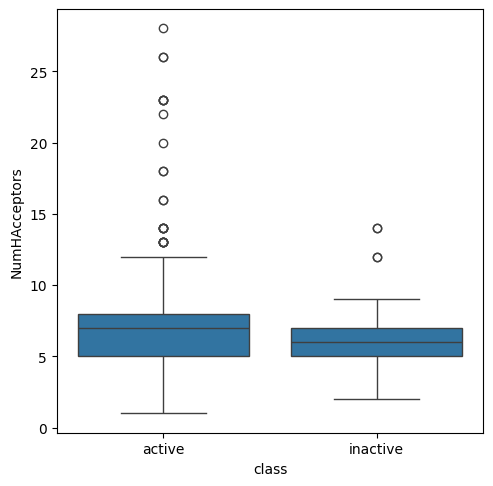

In [ ]:
# plot numhacceptors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x= 'class', y='NumHAcceptors', data=df6)

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,106073.5,2.717433e-08,0.05,Different distribution (reject H0)


Lipinski's descriptors


All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives accept for logp



Pubchem Descriptors

In [ ]:
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [ ]:
# ! unzip padel.zip

In [ ]:
# selection = ['canonical_smiles','molecule_chembl_id']
# df3_selection = df6[selection]
# df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
# ! cat molecule.smi | head -5

In [ ]:
# ! cat padel.sh

In [ ]:
# ! bash padel.sh

Morgan Fingerprints

In [ ]:
# ── Morgan fingerprints generation (replaces PubChem descriptors) ──

# RDKit imports
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from tqdm import tqdm

def generate_morgan_fingerprints(smiles_list, radius=2, n_bits=2048):
    """
    Generate Morgan fingerprints for a list of SMILES strings.

    Parameters:
    - smiles_list: iterable of SMILES strings
    - radius: circular fingerprint radius (default=2)
    - n_bits: length of the bit vector (default=2048)

    Returns:
    - pandas.DataFrame of shape (len(smiles_list), n_bits)
    """
    fps = []
    for smi in tqdm(smiles_list, desc="Generating Morgan fingerprints"):
        mol = Chem.MolFromSmiles(smi)
        if mol:
            fp_vect = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
            fps.append(list(fp_vect))
        else:
            fps.append([0] * n_bits)
    cols = [f"FP_{i}" for i in range(n_bits)]
    return pd.DataFrame(fps, columns=cols)

# Load your preprocessed bioactivity data
# df5 = pd.read_csv('bioactivty_data_preprocessed_class.csv')  # adjust filename if needed

# Generate Morgan fingerprints
morgan_df = generate_morgan_fingerprints(df6['canonical_smiles'], radius=2, n_bits=2048)

# Combine with existing data
df_combined = pd.concat([df5.reset_index(drop=True), morgan_df.reset_index(drop=True)], axis=1)

# Save the new dataset
df_combined.to_csv('bioactivity_with_morgan_fps.csv', index=False)

print("Saved bioactivity_with_morgan_fps.csv with shape", df_combined.shape)


Generating Morgan fingerprints: 100%|██████████| 1276/1276 [00:04<00:00, 275.71it/s]


Saved bioactivity_with_morgan_fps.csv with shape (1276, 2053)


In [ ]:
df4_x = pd.read_csv('bioactivity_with_morgan_fps.csv')
df4_x

,molecule_chembl_id,canonical_smiles,standard_value,class,activity,FP_0,FP_1,FP_2,FP_3,FP_4,...,FP_2038,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047
0,CHEMBL4089730,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,96.00,active,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL4516321,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,2.50,active,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL4436703,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,2.20,active,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4525587,COc1nc(OCc2cccc(-c3cccc(COc4ccc(CNCCNC(C)=O)c(...,25.00,active,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4575618,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,3.00,active,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,CHEMBL5426840,CC(C)OC(=O)[C@H](CO)NCc1cc(Cl)c(OCc2cccc(-c3cc...,45.20,active,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1272,CHEMBL5397229,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CNC(C)(C)C(=O)O)...,2.70,active,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1273,CHEMBL4873960,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN(CCCN(C)C)CCS(...,2.70,active,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1274,CHEMBL1201303,Cc1cc(/C=C/c2ccc3cc(N(C)C)ccc3[n+]2C)c(C)n1-c1...,29.66,active,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df4_x = df4_x.drop(columns=['canonical_smiles','molecule_chembl_id','standard_value','class','activity'])
df4_x

,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,FP_9,...,FP_2038,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Preparing the X and Y Data Matrices

In [ ]:
# df3_X= pd.read_csv('/content/sample_data/descriptors_output (1).csv')

In [ ]:
# df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
# df3_X

In [ ]:
# df3_X = df3_X.drop(columns=['Name'])
# df3_X

Y variable

In [ ]:
df6 = pd.read_csv('bioactivity_data_3class_pIC50.csv')

In [ ]:
# df6 = pd.read_csv('/content/bioactivty_data_preprocessed_class.csv')

In [ ]:
df3_Y = df6['activity']
df3_Y

,activity
0,1
1,1
2,1
3,1
4,1
...,...
1271,1
1272,1
1273,1
1274,1


In [ ]:

# df3_Y = df5['pIC50']
# df3_Y

In [ ]:
dataset4 = pd.concat([df4_x,df3_Y], axis=1)
dataset4

,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,FP_9,...,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047,activity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1272,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# dataset3 = pd.concat([df3_X,df3_Y], axis=1)
# dataset3

In [ ]:
# dataset3.to_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
# dataset3.to_csv('bioactivity_data_descriptors_activity_fp.csv', index=False)

In [ ]:
dataset4.to_csv('bioactivity_data_descriptors_morgan.csv', index=False)

### MODEL BUILDING

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  matthews_corrcoef, roc_curve, auc, RocCurveDisplay, f1_score, precision_score, recall_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Classifiers
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# df = pd.read_csv('bioactivity_data_descriptors_activity_fp.csv')


In [ ]:
df=pd.read_csv('bioactivity_data_descriptors_morgan.csv')

In [ ]:
# df = pd.read_csv('/content/bioactivity_data_3class_activity_activity_fp.csv')

input features

In [ ]:
X = df.drop('activity', axis=1)
X

,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,FP_9,...,FP_2038,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


output features

In [ ]:
# Y = df.pIC50
# Y

In [ ]:
Y = df.activity
Y

,activity
0,1
1,1
2,1
3,1
4,1
...,...
1271,1
1272,1
1273,1
1274,1


In [ ]:
X.shape

(1276, 2048)

In [ ]:
Y.shape

(1276,)

In [ ]:
Y.value_counts()

,count
activity,
1,1129
0,147


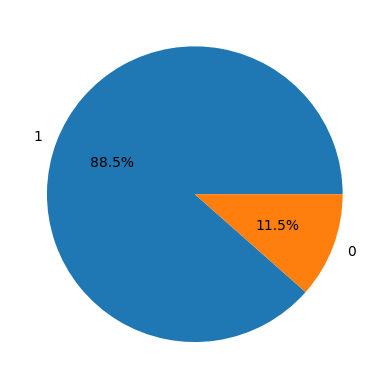

In [ ]:
plt.pie(Y.value_counts(), labels=Y.unique(), autopct='%1.1f%%')
plt.savefig('unbalanced_class_pie_chart.png')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

In [ ]:
Y.value_counts()

,count
activity,
1,1129
0,1129


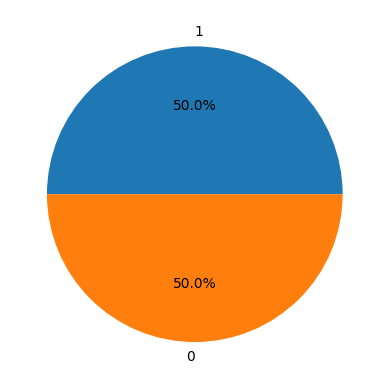

In [ ]:
plt.pie(Y.value_counts(), labels=Y.unique(), autopct='%1.1f%%')
plt.savefig('balanced_class__pie_chart.png')
plt.show()

Remove low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
# save selection
import pickle
pickle.dump(selection, open('variance_threshold.pkl', 'wb'))

In [ ]:
X.shape

(2258, 52)

split dataset

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((1806, 52), (1806,))

In [ ]:
X_test.shape, Y_test.shape

((452, 52), (452,))

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=120, random_state = 42)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)

# evaluate model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='macro')
mcc = matthews_corrcoef(Y_test, y_pred)
Recall = recall_score(Y_test, y_pred, average='macro')
Precision = precision_score(Y_test, y_pred, average='macro')
roc_auc = roc_auc_score(Y_test, y_pred)

# Print the results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall:    {Recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"MCC:       {mcc:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


Accuracy:  0.9867
Precision: 0.9865
Recall:    0.9871
F1 Score:  0.9867
MCC:       0.9736
ROC AUC:   0.9871


External Testing

In [ ]:
# save rf
import pickle
pickle.dump(rf, open('rf.pkl', 'wb'))
# save selection
import pickle
pickle.dump(selection, open('variance_threshold.pkl', 'wb'))

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import joblib

# Load feature selector and model
selector = joblib.load("variance_threshold.pkl")
model = joblib.load("rf.pkl")

def smiles_to_morgan(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError(f"Invalid SMILES: {smiles}")
    return AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)

def predict_activity(smiles_list):
    fingerprints = []
    valid_smiles = []
    for smi in smiles_list:
        try:
            fp = smiles_to_morgan(smi)
            fingerprints.append(np.array(fp))
            valid_smiles.append(smi)
        except ValueError as e:
            print(e)

    if not fingerprints:
        print("No valid SMILES to predict.")
        return

    X_full = np.array(fingerprints)

    # Transform using the saved selector (to reduce from 2048 to 55 features)
    X = selector.transform(X_full)

    probas = model.predict_proba(X)
    preds = model.predict(X)

    results = pd.DataFrame({
        "SMILES": valid_smiles,
        "Prediction": ["Active" if p == 1 else "Inactive" for p in preds],
        "Confidence": np.max(probas, axis=1)
    })

    return results

# Example usage
external_smiles = ["CCO", "CCCCCCCC(=O)O", "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"]
results = predict_activity(external_smiles)
print(results)


                         SMILES Prediction  Confidence
0                           CCO   Inactive    0.933333
1                 CCCCCCCC(=O)O   Inactive    0.908333
2  CN1C=NC2=C1C(=O)N(C(=O)N2C)C     Active    0.566667


In [ ]:
# Hyperparameter tunning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,120,150],
    'max_depth': [None, 8,10],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring ='accuracy', verbose =1, n_jobs=1 )
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(best_params)
print(grid_search.best_score_)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.980073664825046


ExtraTrees

In [ ]:
# Intialize and train the classifier

et = ExtraTreesClassifier(n_estimators=120,max_depth=8, random_state = 42)
et.fit(X_train, Y_train)

# make predictions
y_pred = et.predict(X_test)

# evaluate model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='macro')
mcc = matthews_corrcoef(Y_test, y_pred)
Recall = recall_score(Y_test, y_pred, average='macro')
Precision = precision_score(Y_test, y_pred, average='macro')
roc_auc = roc_auc_score(Y_test, y_pred)
# print results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall:    {Recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Accuracy:  0.9845
Precision: 0.9844
Recall:    0.9851
F1 Score:  0.9845


In [ ]:
# save ExtraTrees
import pickle
pickle.dump(et, open('et.pkl', 'wb'))

In [ ]:
# Hyperparameter tuning using gridsearchcv
param_grid = {
    'n_estimators': [100,120,150],
    'max_depth': [None,8,10],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=10, scoring ='accuracy', verbose =1, n_jobs=1 )
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(best_params)
print(grid_search.best_score_)

KNN

In [ ]:
# Initialize and train the classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
mcc = matthews_corrcoef(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

# Print the results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"MCC:       {mcc:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

Accuracy:  0.9624
Precision: 0.9637
Recall:    0.9638
F1 Score:  0.9624
MCC:       0.9275
ROC AUC:   0.9638


In [ ]:
# save knn
import pickle
pickle.dump(knn, open('knn.pkl', 'wb'))

In [ ]:
# Hyperparameter tunning with gridsearchcv
param_grid = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform', 'distance'],
    'p': [1,2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring ='accuracy', verbose =1, n_jobs=1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(best_params)
print(grid_search.best_score_)

AdaBoost

In [ ]:
# Initialize and train the classifier

adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, Y_train)

# make Predictions
y_pred = adaboost.predict(X_test)

# evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='macro')
mcc = matthews_corrcoef(Y_test, y_pred)
recall = recall_score(Y_test, y_pred, average='macro')
precision = precision_score(Y_test, y_pred, average='macro')
roc_auc = roc_auc_score(Y_test, y_pred)

# print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.92
F1 Score: 0.92
MCC: 0.84
Recall: 0.92
Precision: 0.92
ROC AUC: 0.92


In [ ]:
# save adaboost
import pickle
pickle.dump(adaboost, open('adaboost.pkl', 'wb'))

In [ ]:
# Hyperparameter tunning using gridsearchcv
param_grid = {
    'n_estimators': [100,120,150],
    'learning_rate': [0.01,0.1,1],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [42]

}
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=10, scoring ='accuracy', verbose =1, n_jobs=1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(best_params)
print(grid_search.best_score_)

Gradient Boost

In [ ]:
# Intialize and train the classifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, Y_train)

# make predictions
y_pred = gb.predict(X_test)

# evaluate model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='macro')
mcc = matthews_corrcoef(Y_test, y_pred)
Recall = recall_score(Y_test, y_pred, average='macro')
Precision = precision_score(Y_test, y_pred, average='macro')
roc_auc = roc_auc_score(Y_test, y_pred)

# print results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"MCC:       {mcc:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

Accuracy:  0.9823
Precision: 0.9225
Recall:    0.9224
F1 Score:  0.9823
MCC:       0.9649
ROC AUC:   0.9828


In [ ]:
# save GradientBoosting
import pickle
pickle.dump(gb, open('gb.pkl', 'wb'))

In [ ]:
# Hyperparameter tunning using gridsearchcv
param_grid = {
    'n_estimators': [100,120,150],
    'learning_rate': [0.01,0.1,1],
    'max_depth': [3,5,7],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2],
    'max_features': ['auto', 'sqrt'],
    'subsample': [0.8,1.0]

}
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=10, scoring ='accuracy', verbose =1, n_jobs=1)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(best_params)
print(grid_search.best_score_)


### APPLICABILITY DOMAIN

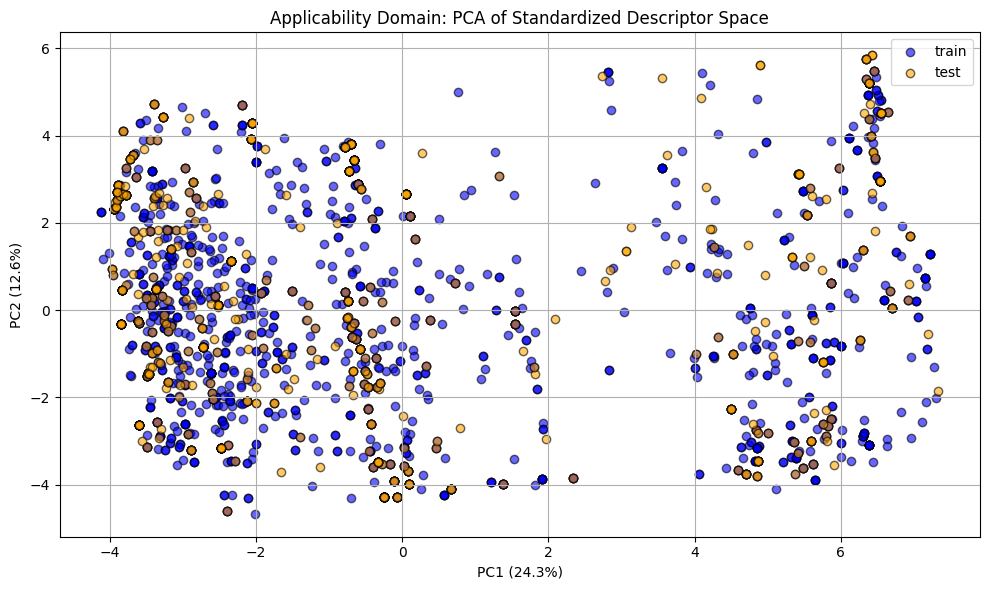

In [ ]:
# Combine X_train and X_test for PCA projection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_all = np.vstack([X_train, X_test])
y_all = np.concatenate([['train'] * len(X_train), ['test'] * len(X_test)])

# Standardize descriptors
scaler = StandardScaler()
X_all_std = scaler.fit_transform(X_all)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all_std)

# Plot
plt.figure(figsize=(10, 6))
for label, color in zip(['train', 'test'], ['blue', 'orange']):
    idxs = (y_all == label)
    plt.scatter(X_pca[idxs, 0], X_pca[idxs, 1], c=color, label=label, alpha=0.6, edgecolor='k')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Applicability Domain: PCA of Standardized Descriptor Space")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("applicability_domain_pca.png", dpi=300)
plt.show()
